In [2]:
def show_example(example, label, dim=(28, 28)):
    """
    Displays a single example and label.
    If example is already unrolled from (28, 28) to (784,), it will be reshaped first.
    """
    example = np.squeeze(example)
    label = np.squeeze(label)
    if example.shape != dim:
        example = example.reshape(dim)
    plt.imshow(example, cmap='binary')
    plt.xlabel('Label: ' + str(int(label)))
    plt.yticks([])
    plt.xticks([])
    plt.show()

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

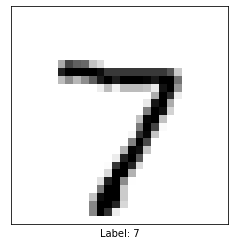

In [4]:
show_example(x_test[0], y_test[0])

In [5]:
print('Shape of x train: ', x_train.shape)
print('Shape of y train: ', y_train.shape)
print('Shape of x test: ', x_test.shape)
print('Shape of y test: ', y_test.shape)

Shape of x train:  (60000, 28, 28)
Shape of y train:  (60000,)
Shape of x test:  (10000, 28, 28)
Shape of y test:  (10000,)


In [6]:
# MNIST dataset parameters.
num_classes = 10 # 0 to 9 digits
num_features = 784 # 28*28

# Training parameters.
learning_rate = 0.01
training_steps = 1000
batch_size = 256
display_step = 50

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

In [22]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [24]:
# Weight of shape [784, 10], the 28*28 image features, and total number of classes.
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")
# Bias of shape [10], the total number of classes.
b = tf.Variable(tf.zeros([num_classes]), name="bias")

# Logistic regression (Wx + b).
def logistic_regression(x):
    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred) + (1-y_true) * tf.math.log(1-y_pred),1))

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [25]:
# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [26]:
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 50, loss: 2.645669, accuracy: 0.710938
step: 100, loss: 2.241494, accuracy: 0.773438
step: 150, loss: 2.011868, accuracy: 0.757812
step: 200, loss: 1.661606, accuracy: 0.800781
step: 250, loss: 1.545889, accuracy: 0.835938
step: 300, loss: 1.426264, accuracy: 0.816406
step: 350, loss: 1.384900, accuracy: 0.835938
step: 400, loss: 1.190131, accuracy: 0.859375
step: 450, loss: 1.098926, accuracy: 0.890625
step: 500, loss: 1.263881, accuracy: 0.824219
step: 550, loss: 1.140792, accuracy: 0.832031
step: 600, loss: 1.109887, accuracy: 0.859375
step: 650, loss: 1.025234, accuracy: 0.835938
step: 700, loss: 0.984845, accuracy: 0.867188
step: 750, loss: 1.032359, accuracy: 0.847656
step: 800, loss: 0.825284, accuracy: 0.898438
step: 850, loss: 0.940616, accuracy: 0.855469
step: 900, loss: 0.923972, accuracy: 0.882812
step: 950, loss: 0.893590, accuracy: 0.867188
step: 1000, loss: 0.814020, accuracy: 0.878906


In [28]:
# Test model on validation set.
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.875800


In [39]:
# Predict 5 images from validation set.
n_images = 5
test_images = x_test[:n_images]
predictions = logistic_regression(test_images)

# Display image and model prediction.
for i in range(n_images):
    show_example(test_images[i], np.argmax(predictions.numpy()[i]))
    plt.show()
    print("Model prediction: {}, probability: {} ".format(np.argmax(predictions.numpy()[i]), predictions.numpy()[i][np.argmax(predictions.numpy()[i]]))

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-39-7fc44a7f41b8>, line 10)

In [27]:
np.squeeze(x_train[0]).shape

(784,)

In [10]:
x_train[0].shape

(784,)

In [11]:
x = np.array([[[0], [1], [2]]])

In [12]:
x.shape

(1, 3, 1)

In [13]:
np.squeeze(x).shape

(3,)

In [14]:
x.shape

(1, 3, 1)

In [17]:
gfg = tf.data.Dataset.from_tensor_slices(([[5, 10], [3, 6]],[1, 2]) ) 

In [32]:
test_images = x_test[:n_images]

In [36]:
predictions.numpy()[i]

array([1.7979834e-02, 6.0696522e-04, 4.7364768e-02, 5.9391703e-03,
       6.8933511e-01, 1.1244542e-02, 3.3042233e-02, 5.0944634e-02,
       3.4082264e-02, 1.0946045e-01], dtype=float32)